Name : Vaidik Pandya
Roll No : 21BCP228
Division : 4
Group : 7

Assignment 7 : Design deep learning based vehicle detection model using CNN. Use the below dataset for training and testing the model performance. 


Step 1 : Importing all the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
import random
from keras.utils import img_to_array,to_categorical

Step 2 : getting the Directory

In [37]:
vehicle_img = len(os.listdir("vehicles"))
v_img = os.listdir("vehicles")

Step 3 : Exploring the dataset

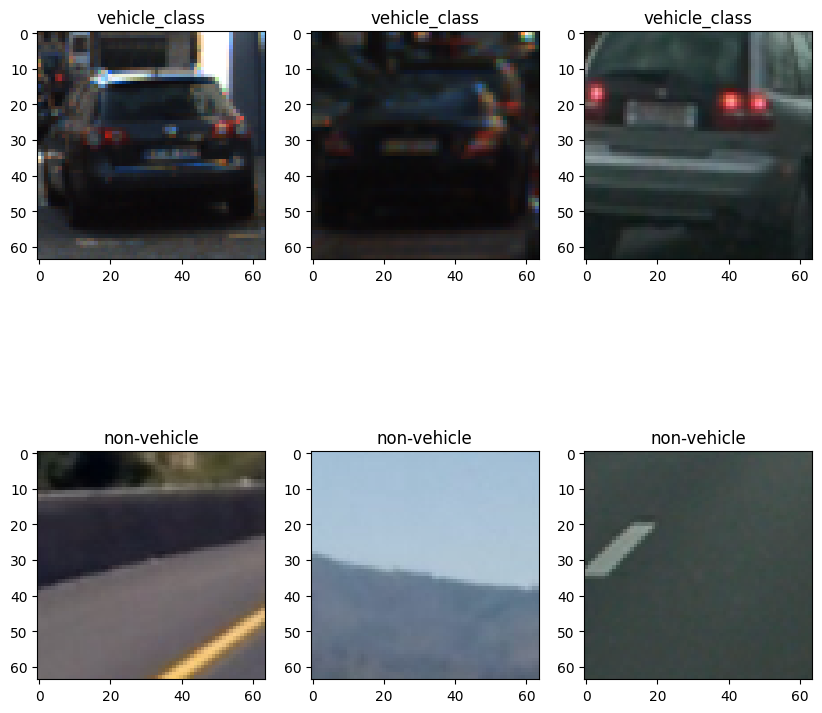

In [38]:
fig,ax=plt.subplots(2,3,figsize=(10,10))
ax=ax.ravel()
m = 0
n = 3
for i in range(3):
  img=plt.imread("vehicles/"+ np.random.choice(os.listdir("vehicles")))
  ax[m].imshow(img)
  ax[m].set_title("vehicle_class")
  m=m+1
for j in range(3):
  img=plt.imread("non-vehicles/"+ np.random.choice(os.listdir("non-vehicles")))
  ax[n].imshow(img)
  ax[n].set_title("non-vehicle")
  n=n+1  

Step 4 : convery the Images to Array

In [44]:
# image = cv2.imread(os.path.join("vehicles",v_img[3]))
# image_arr=img_to_array(image)
# image_arr.shape

(64, 64, 3)

In [41]:
def convert_imge_array(image):
  try:
    img=cv2.imread(image)
    if img is not None:
      img=cv2.resize(img,(64,64))
      return img_to_array(img)
    else:
      return np.array([])
  except Exception as e:
    print("Error",e)

Step 5 : Labeling the Images

In [42]:
img_list=[]
img_label = []
all_v_image = os.listdir("vehicles")
for i in all_v_image:
    img_list.append(convert_imge_array(os.path.join("vehicles",i)))
    img_label.append(0)

In [45]:
all_nv_image = os.listdir("non-vehicles")
for i in all_nv_image:
    img_list.append(convert_imge_array(os.path.join("non-vehicles",i)))
    img_label.append(1)

In [46]:
img_list

[array([[[ 42.,  36.,  34.],
         [ 42.,  35.,  33.],
         [ 40.,  33.,  33.],
         ...,
         [123., 110.,  92.],
         [121., 112., 118.],
         [120., 113., 145.]],
 
        [[ 43.,  39.,  39.],
         [ 44.,  40.,  38.],
         [ 44.,  39.,  37.],
         ...,
         [127., 108.,  91.],
         [128., 126., 118.],
         [129., 146., 147.]],
 
        [[ 44.,  42.,  43.],
         [ 48.,  44.,  42.],
         [ 48.,  43.,  40.],
         ...,
         [129., 108.,  91.],
         [130., 142., 121.],
         [132., 178., 152.]],
 
        ...,
 
        [[224., 246., 254.],
         [228., 242., 255.],
         [232., 240., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],
 
        [[231., 247., 252.],
         [230., 245., 254.],
         [229., 243., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],
 
        [[245., 251., 251.],
 

In [47]:
img_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [48]:
nor_image = np.array(img_list,dtype=np.float16)/255.0

In [49]:
nor_image = nor_image.reshape(-1,64,64,3)

In [50]:
nor_image.shape

(17760, 64, 64, 3)

Step 6 : Splitting the Data for training and testing

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(nor_image,img_label,random_state=0)

In [52]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

Step 7 : Train the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten

In [59]:
model = Sequential()
model.add(Conv2D(50,(5,5),padding='same',input_shape=(64,64,3),activation="relu"))
model.add(Conv2D(10,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 50)        3800      
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 10)        12510     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 10)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 9000)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               900100    
                                                                 
 dense_7 (Dense)             (None, 20)                2020      
                                                      

In [61]:
import tensorflow as tf
if tf.config.experimental.list_physical_devices('GPU'):
    model = tf.distribute.MirroredStrategy().scope().experimental_run_v2(lambda: model)

In [62]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [63]:
hist =model.fit(xtrain,ytrain,batch_size=32,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
417/417 [==============================] - 22s 51ms/step - loss: 0.1915 - accuracy: 0.9233 - val_loss: 0.0844 - val_accuracy: 0.9716
Epoch 2/5
417/417 [==============================] - 20s 49ms/step - loss: 0.0843 - accuracy: 0.9717 - val_loss: 0.0785 - val_accuracy: 0.9761
Epoch 3/5
417/417 [==============================] - 21s 50ms/step - loss: 0.0544 - accuracy: 0.9811 - val_loss: 0.0848 - val_accuracy: 0.9755
Epoch 4/5
417/417 [==============================] - 20s 49ms/step - loss: 0.0307 - accuracy: 0.9883 - val_loss: 0.0637 - val_accuracy: 0.9806
Epoch 5/5
417/417 [==============================] - 21s 49ms/step - loss: 0.0286 - accuracy: 0.9902 - val_loss: 0.0612 - val_accuracy: 0.9822


In [64]:
model.save_weights("action.h5")

In [77]:
pred = model.predict(xtest)

139/139 [==============================] - 2s 16ms/step


In [78]:

ytest

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [79]:
pred

array([[9.9999952e-01, 4.4275069e-07],
       [9.9996448e-01, 3.5565543e-05],
       [8.6717466e-03, 9.9132830e-01],
       ...,
       [2.4975894e-04, 9.9975020e-01],
       [9.9999428e-01, 5.6662716e-06],
       [4.7776615e-03, 9.9522239e-01]], dtype=float32)

Step 8 : Accuracy

In [80]:

import numpy as np



# Convert predicted probabilities to class labels
pred_labels = np.argmax(pred, axis=1)

# Convert 'y_test' to class labels
true_labels = np.argmax(ytest, axis=1)

# Calculate accuracy
accuracy = np.mean(pred_labels == true_labels)

print("Test Accuracy:", accuracy)



Test Accuracy: 0.9822072072072072
